Dataset Head:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Missing Values:
customer_id         0
credit_score        0
country             0
gender              0
age 

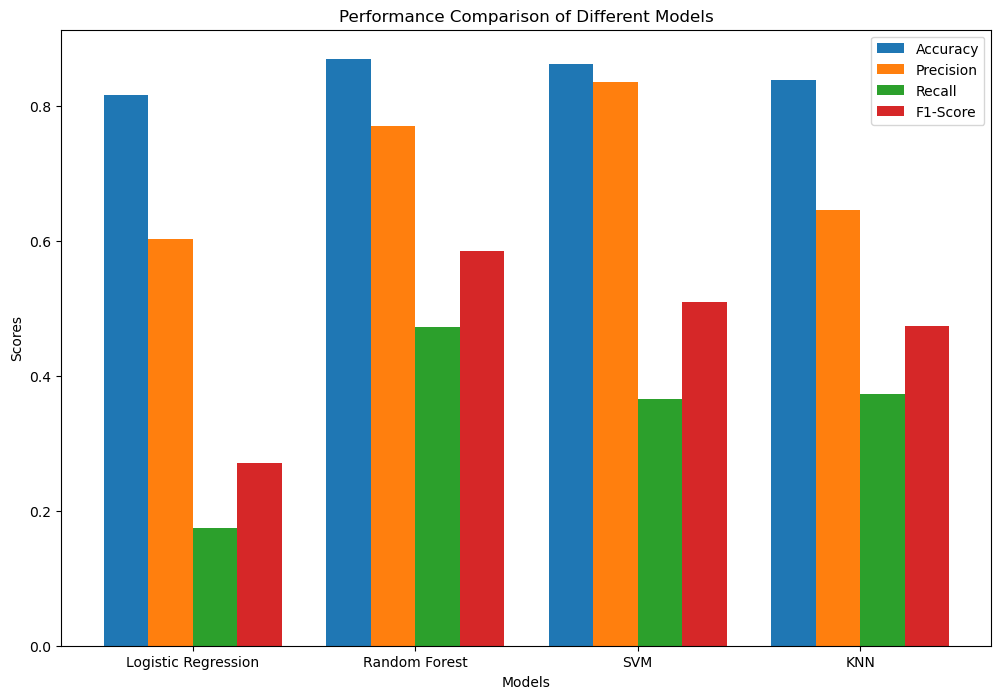

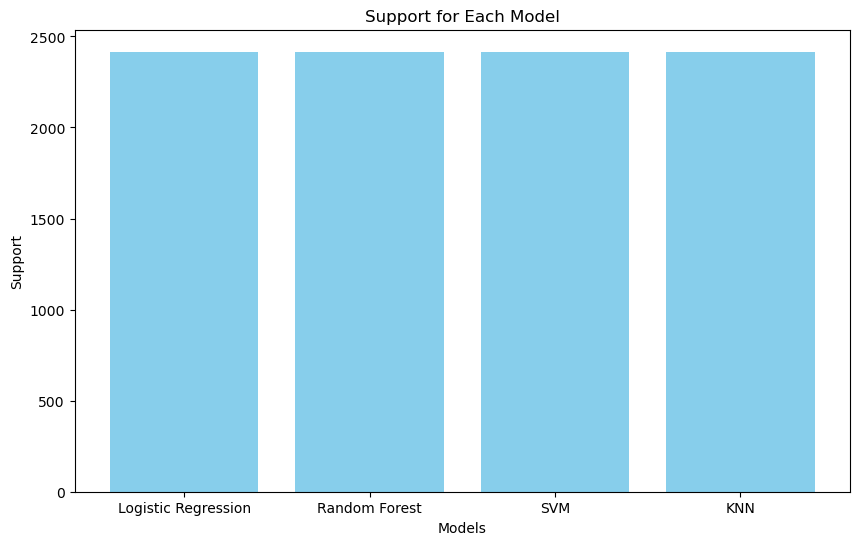

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/bank_customer.csv')


print("Dataset Head:")
print(data.head())


print("\nMissing Values:")
print(data.isnull().sum())


print("\nUnique values in 'churn':")
print(data['churn'].unique())


label_encoders = {}
for column in ['country', 'gender', 'credit_card', 'active_member']:
    if column in data.columns: 
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    else:
        print(f"Column '{column}' not found in the dataset.")


X = data.drop(columns=['churn'])  
y = data['churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate model performance
def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    return accuracy, precision, recall, f1, report

# Initialize and train machine learning models

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
logreg.fit(X_train, y_train)
accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, report_logreg = evaluate_model_performance(logreg, X_test, y_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_rf, precision_rf, recall_rf, f1_rf, report_rf = evaluate_model_performance(rf, X_test, y_test)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
accuracy_svm, precision_svm, recall_svm, f1_svm, report_svm = evaluate_model_performance(svm, X_test, y_test)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy_knn, precision_knn, recall_knn, f1_knn, report_knn = evaluate_model_performance(knn, X_test, y_test)

# Display results
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy': [accuracy_logreg, accuracy_rf, accuracy_svm, accuracy_knn],
    'Precision': [precision_logreg, precision_rf, precision_svm, precision_knn],
    'Recall': [recall_logreg, recall_rf, recall_svm, recall_knn],
    'F1-Score': [f1_logreg, f1_rf, f1_svm, f1_knn],
    'Support': [report_logreg['0']['support'], report_rf['0']['support'], report_svm['0']['support'], report_knn['0']['support']]
}

results_df = pd.DataFrame(results)
print("\nModel Performance Metrics:")
print(results_df)

# Step 4: Matrix Operations for Financial Analysis

# Generate random matrices for demonstration
matrix_A = np.random.rand(5, 5)
matrix_B = np.random.rand(5, 5)

# Matrix Multiplication
product = np.dot(matrix_A, matrix_B)

# Eigenvalue Computation
eigenvalues, eigenvectors = np.linalg.eig(matrix_A)

# Singular Value Decomposition (SVD)
U, s, VT = np.linalg.svd(matrix_A)

# Print results of matrix operations
print("\nMatrix A:")
print(matrix_A)
print("\nMatrix B:")
print(matrix_B)
print("\nMatrix A * Matrix B:")
print(product)
print("\nEigenvalues of Matrix A:")
print(eigenvalues)
print("\nEigenvectors of Matrix A:")
print(eigenvectors)
print("\nSVD of Matrix A:")
print("U:", U)
print("Singular Values:", s)
print("VT:", VT)

# Step 5: Plotting Performance Metrics

# Plotting accuracy comparison
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(results['Model']))
plt.bar(index, results['Accuracy'], bar_width, label='Accuracy')
plt.bar(index + bar_width, results['Precision'], bar_width, label='Precision')
plt.bar(index + 2 * bar_width, results['Recall'], bar_width, label='Recall')
plt.bar(index + 3 * bar_width, results['F1-Score'], bar_width, label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison of Different Models')
plt.xticks(index + 1.5 * bar_width, results['Model'])
plt.legend()
plt.show()

# Plotting support for each model
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Support'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Support')
plt.title('Support for Each Model')
plt.show()
